# Student Performance Indicator

### Lifecycle of a Machine Learning Project
    
- Understanding the problem statement
- Data collection
- Data checks to perform
- Exploratory data analysis (EDA)
- Data pre-processing
- Model training
- Choosing best model

## 1. Problem Statement
- This project understands how the student's performance or test scores are affected by other parameters such as gender, ethnicity, parental level of education, lunch, and test preparation course.

## 2. Data Collection
- Dataset source: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
- The data consists of 8 columns and 1000 rows.

## 2.1. Import data and required packages
### Importing pandas, numpy, seaborn, matplotlib, warnings libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Import CSV data as pandas dataframe, show its shape and top 5 records

In [3]:
df = pd.read_csv("data/students_performance.csv")
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (1000, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## 2.2. Dataset Information
- gender: Gender of students -> male/female
- race/ethnicity: Ethinicity of students -> group A, B, C, D, E
- parental level of education: Parents' final education -> bachelor's degree, some college, master's degree, associate's degree, high school
- lunch: Having lunch before test -> standard, reduced
- test preparation course: Complete or not complete before test
- math score, reading core, writing score: Test scores

## 3. Data checks to perform
- Check missing values
- Check duplicates
- Check data types
- Check the number of unique values of each column
- Check statistics of dataset
- Check various categories present in different categorical columns

### 3.1. Check missing values

In [6]:
print("Total missing values:") 
df.isna().sum()

Total missing values:


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### Observation: There are no missing values in the dataset

### 3.2. Check duplicates

In [7]:
print("Duplicate values:")
df.duplicated().sum()

# If duplicates found, can remove them by df.drop_duplicates()

Duplicate values:


0

### Observation: There are no duplicate values in the dataset

### 3.3. Check data types

In [8]:
# Check null and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Observation: Test scores are numerical and other remaining features are categorical

### 3.4. Check the number of unique values of each column

In [10]:
print("Unique number of values in each column:")
df.nunique()

Unique number of values in each column:


gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### 3.5. Check statistics of dataset

In [11]:
print("Dataset statistics:")
df.describe()

Dataset statistics:


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insight
- From above description of numerical data, all means are close to each other between 66 and 69.
- All standard deviations are also close between 14.6 and 15.19
- Minimum score for math is 0, for writing is higher = 10, and for reading is even more higher = 17

### 3.6. Check various categories present in different categorical columns

In [12]:
print("Categories in 'gender' feature:   ", df['gender'].unique())
print("Categories in 'race/ethnicity' feature:   ", df['race/ethnicity'].unique())
print("Categories in 'parental level of education' feature:   ", df['parental level of education'].unique())
print("Categories in 'lunch' feature:   ", df['lunch'].unique())
print("Categories in 'test preparation course' feature:   ", df['test preparation course'].unique())

Categories in 'gender' feature:    ['female' 'male']
Categories in 'race/ethnicity' feature:    ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' feature:    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' feature:    ['standard' 'free/reduced']
Categories in 'test preparation course' feature:    ['none' 'completed']


In [13]:
# Define numerical and categorical features
numeric_features = [feature for feature in df.columns if df[feature].dtype != "O"]
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]

print(f"We have {len(numeric_features)} numerical features: {numeric_features}")
print(f"We have {len(categorical_features)} categorical features: {categorical_features}")

We have 3 numerical features: ['math score', 'reading score', 'writing score']
We have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


### 3.7. Adding features for "Total score" and "Average" (Feature Engineering)

In [14]:
df['total score'] = df['math score'] + df['writing score'] + df['reading score']
df['average'] = df['total score'] / 3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [16]:
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()

print(f"Number of students with full score in Maths: {math_full}")
print(f"Number of students with full score in Writing: {writing_full}")
print(f"Number of students with full score in Reading: {reading_full}")

Number of students with full score in Maths: 7
Number of students with full score in Writing: 14
Number of students with full score in Reading: 17


In [17]:
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20 = df[df['writing score'] <= 20]['average'].count()
math_less_20 = df[df['math score'] <= 20]['average'].count()

print(f"Number of students with less than 20 score in Maths: {math_less_20}")
print(f"Number of students with less than 20 score in Writing: {writing_less_20}")
print(f"Number of students with less than 20 score in Reading: {reading_less_20}")

Number of students with less than 20 score in Maths: 4
Number of students with less than 20 score in Writing: 3
Number of students with less than 20 score in Reading: 1


### Insight
- From above values, we observe that students have generally performed worse in maths.
- Students gave best performance in reading.

## 4. Exploring Data (Visualization)
### 4.1. Visualize average score distribution
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1. Histogram and KDE

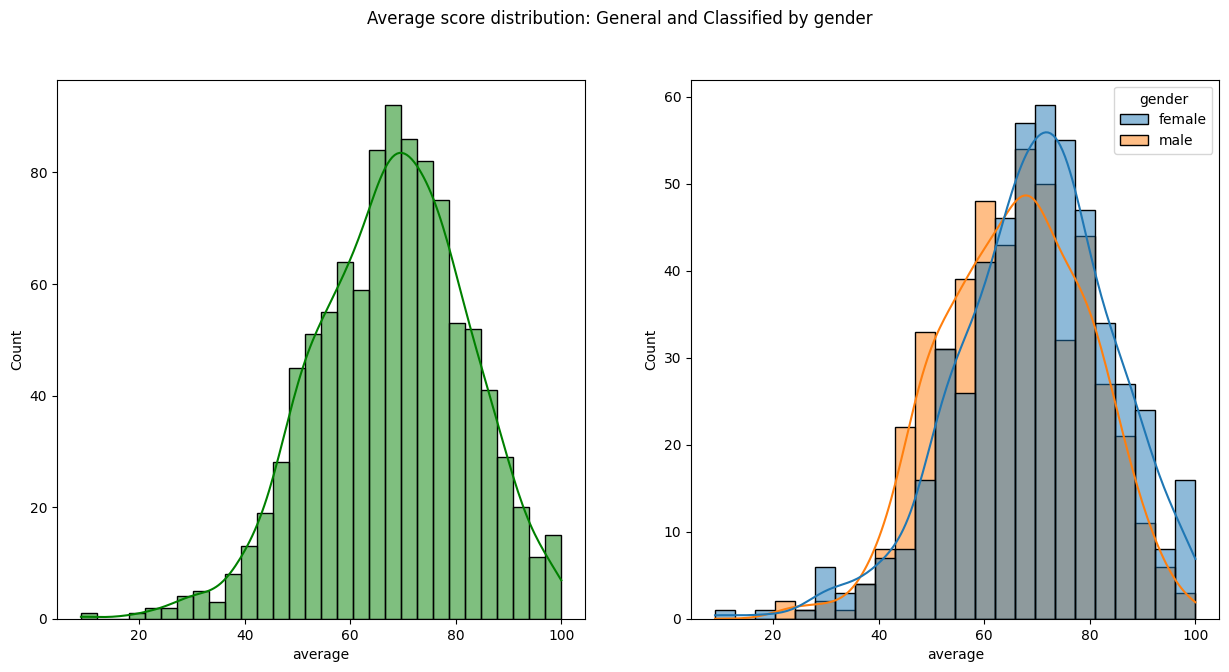

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle("Average score distribution: General and Classified by gender")
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender')
plt.show()

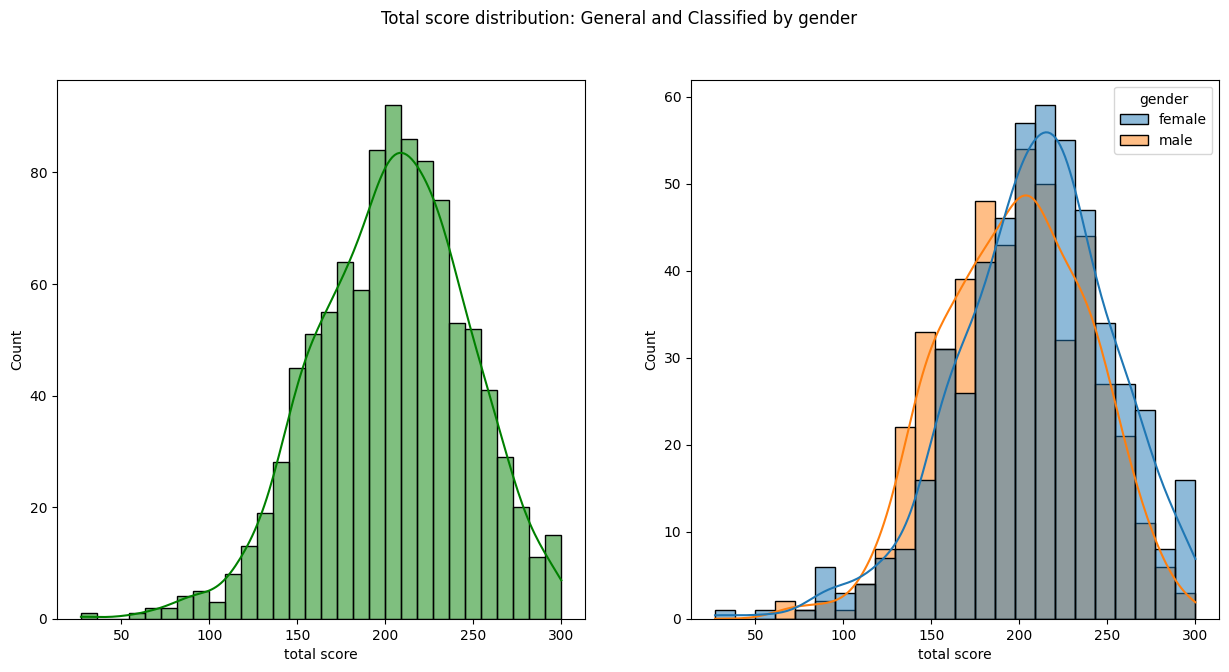

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle("Total score distribution: General and Classified by gender")
plt.subplot(121)
sns.histplot(data=df, x='total score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total score', kde=True, hue='gender')
plt.show()

### Insight
- Female students tend to perform better than male students.

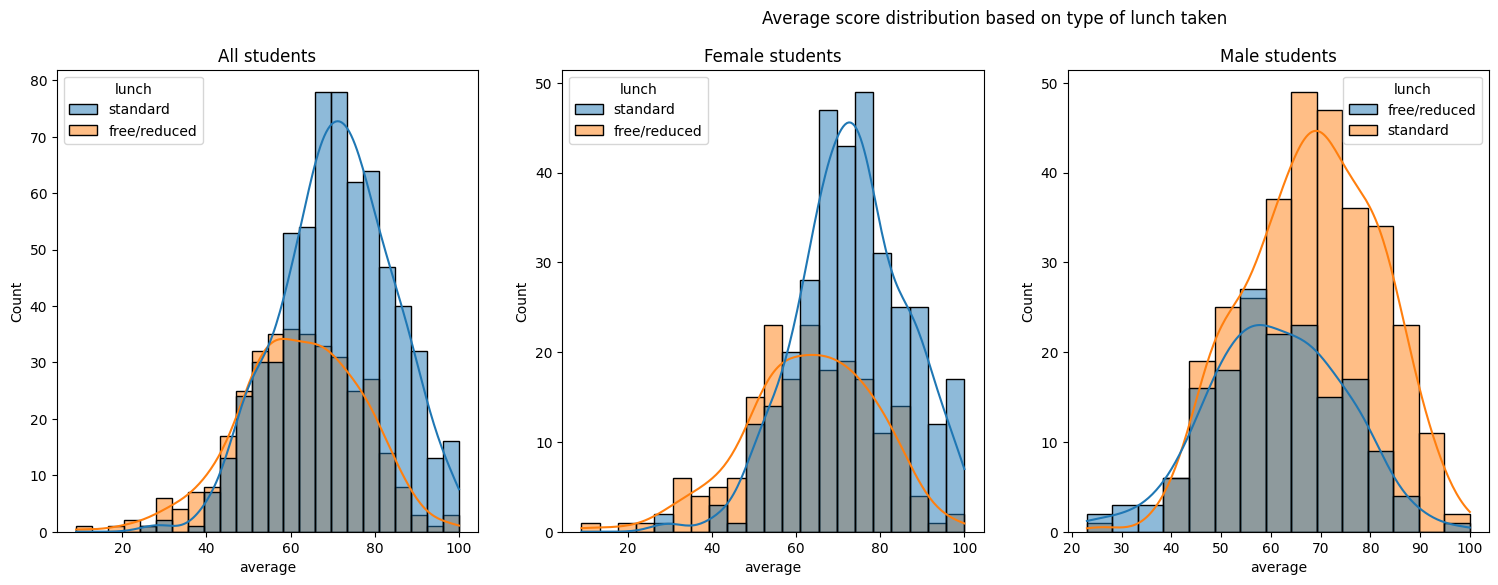

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(25, 6))
fig.suptitle("Average score distribution based on type of lunch taken")
plt.subplot(141)
plt.title("All students")
sns.histplot(data=df, x='average', kde=True, hue='lunch')
plt.subplot(142)
plt.title("Female students")
sns.histplot(data=df[df['gender'] == 'female'], x='average', kde=True, hue='lunch')
plt.subplot(143)
plt.title("Male students")
sns.histplot(data=df[df['gender'] == 'male'], x='average', kde=True, hue='lunch')
plt.show()

### Insight
- Taking standard lunch leads to performing well in exams irrespective of gender

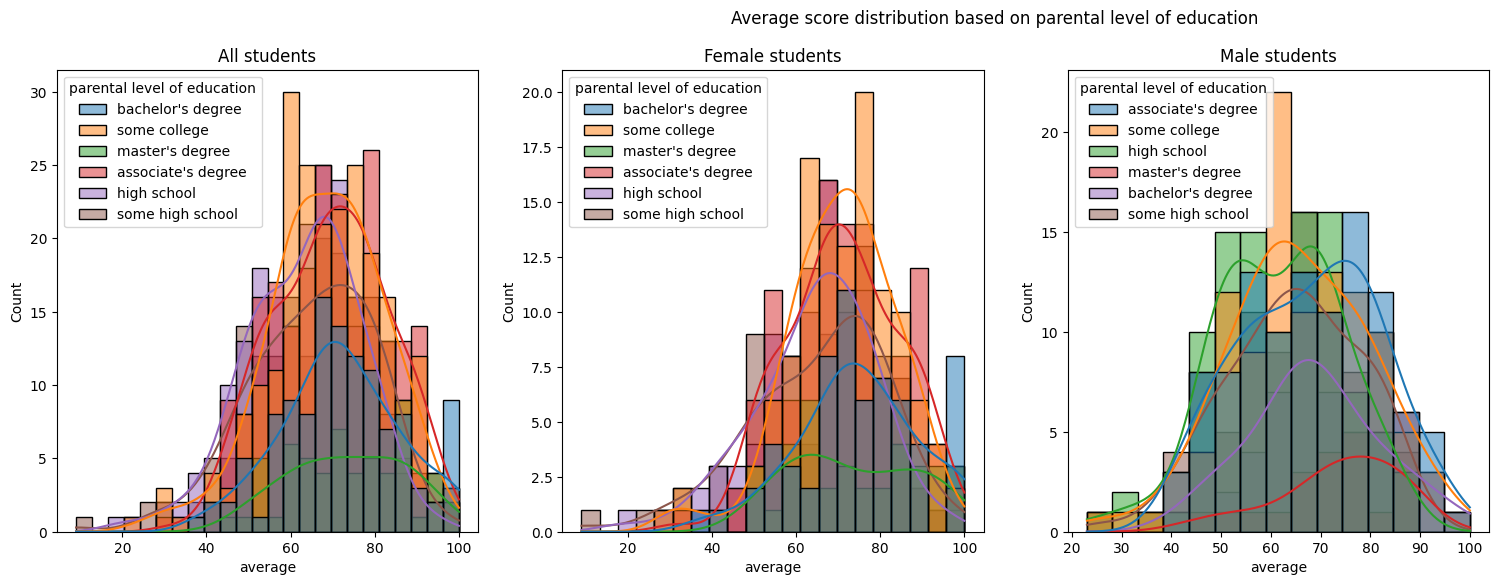

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(25, 6))
fig.suptitle("Average score distribution based on parental level of education")
plt.subplot(141)
plt.title("All students")
sns.histplot(data=df, x='average', kde=True, hue='parental level of education')
plt.subplot(142)
plt.title("Female students")
sns.histplot(data=df[df['gender'] == 'female'], x='average', kde=True, hue='parental level of education')
plt.subplot(143)
plt.title("Male students")
sns.histplot(data=df[df['gender'] == 'male'], x='average', kde=True, hue='parental level of education')
plt.show()

### Insight
- In general parent's education don't participate much in student performing well in exams.
- 2nd plot we can see there is no effect of parent's education on female students.
- 3rd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam.

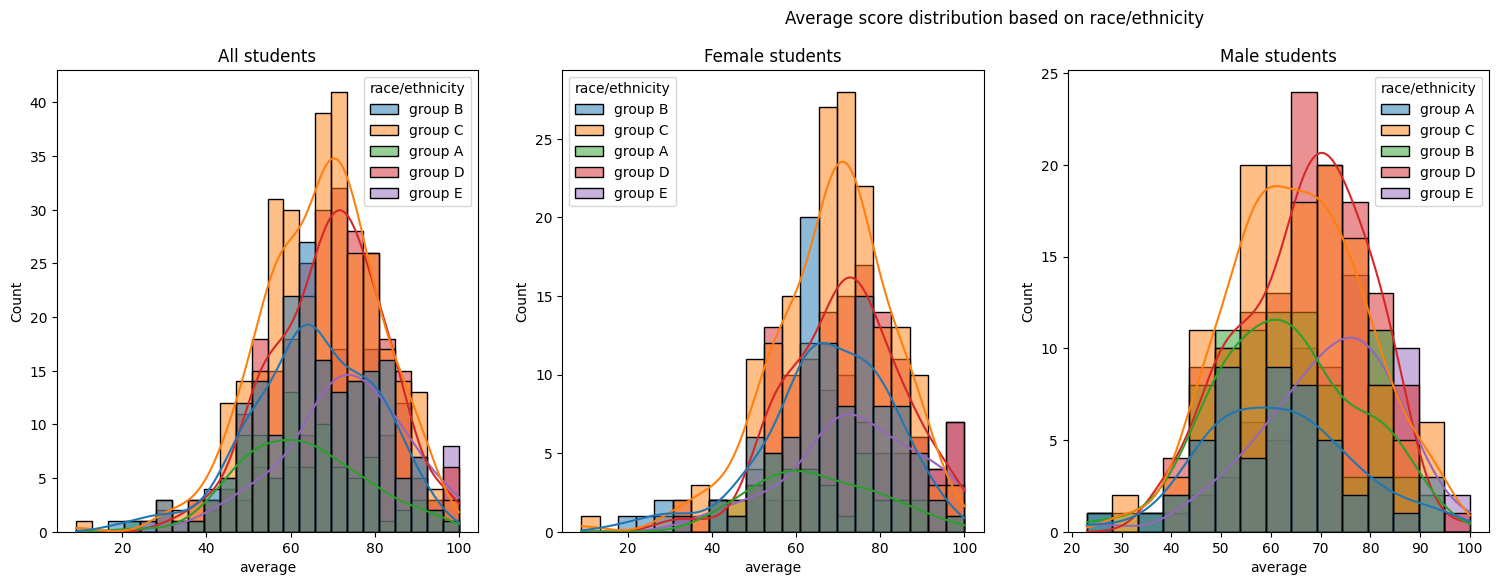

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(25, 6))
fig.suptitle("Average score distribution based on race/ethnicity")
plt.subplot(141)
plt.title("All students")
sns.histplot(data=df, x='average', kde=True, hue='race/ethnicity')
plt.subplot(142)
plt.title("Female students")
sns.histplot(data=df[df['gender'] == 'female'], x='average', kde=True, hue='race/ethnicity')
plt.subplot(143)
plt.title("Male students")
sns.histplot(data=df[df['gender'] == 'male'], x='average', kde=True, hue='race/ethnicity')
plt.show()

### Insight
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female.

### 4.2. Maximum score of students in all subjects

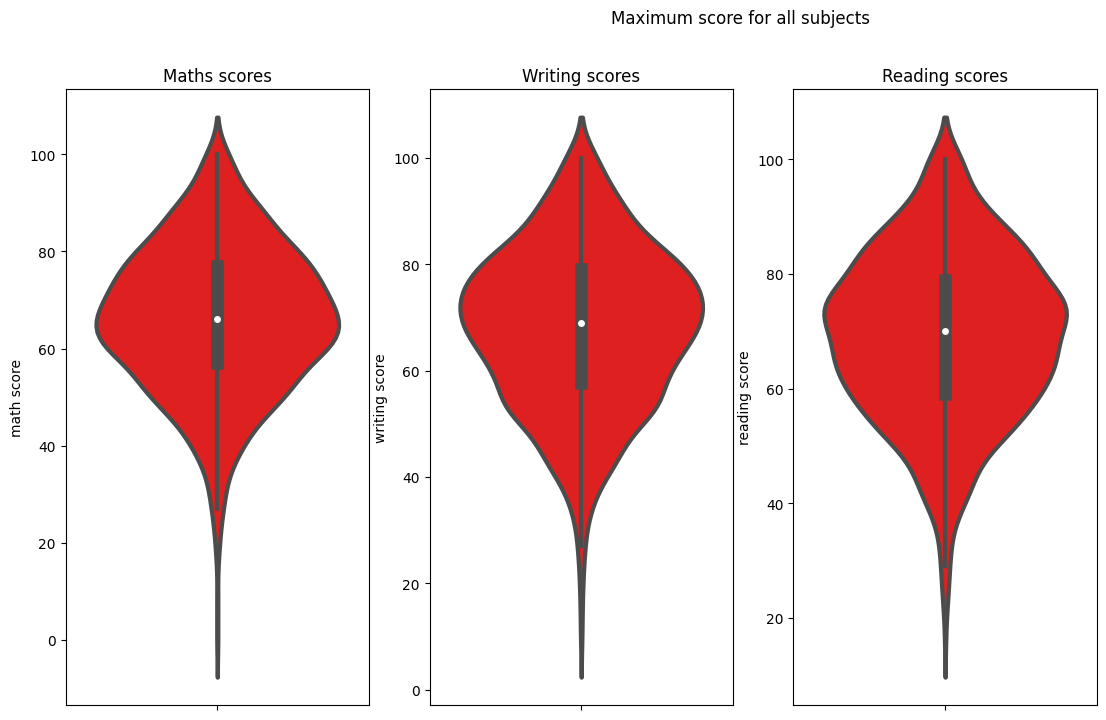

In [32]:
fig, axes = plt.subplots(figsize=(18, 8))
fig.suptitle("Maximum score for all subjects")
plt.subplot(141)
plt.title("Maths scores")
sns.violinplot(data=df, y='math score', color='red', linewidth=3)
plt.subplot(142)
plt.title("Writing scores")
sns.violinplot(data=df, y='writing score', color='red', linewidth=3)
plt.subplot(143)
plt.title("Reading scores")
sns.violinplot(data=df, y='reading score', color='red', linewidth=3)
plt.show()

### Insight
- From the above three plots it's clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80.

### 4.3. Multivariate analysis using pieplot

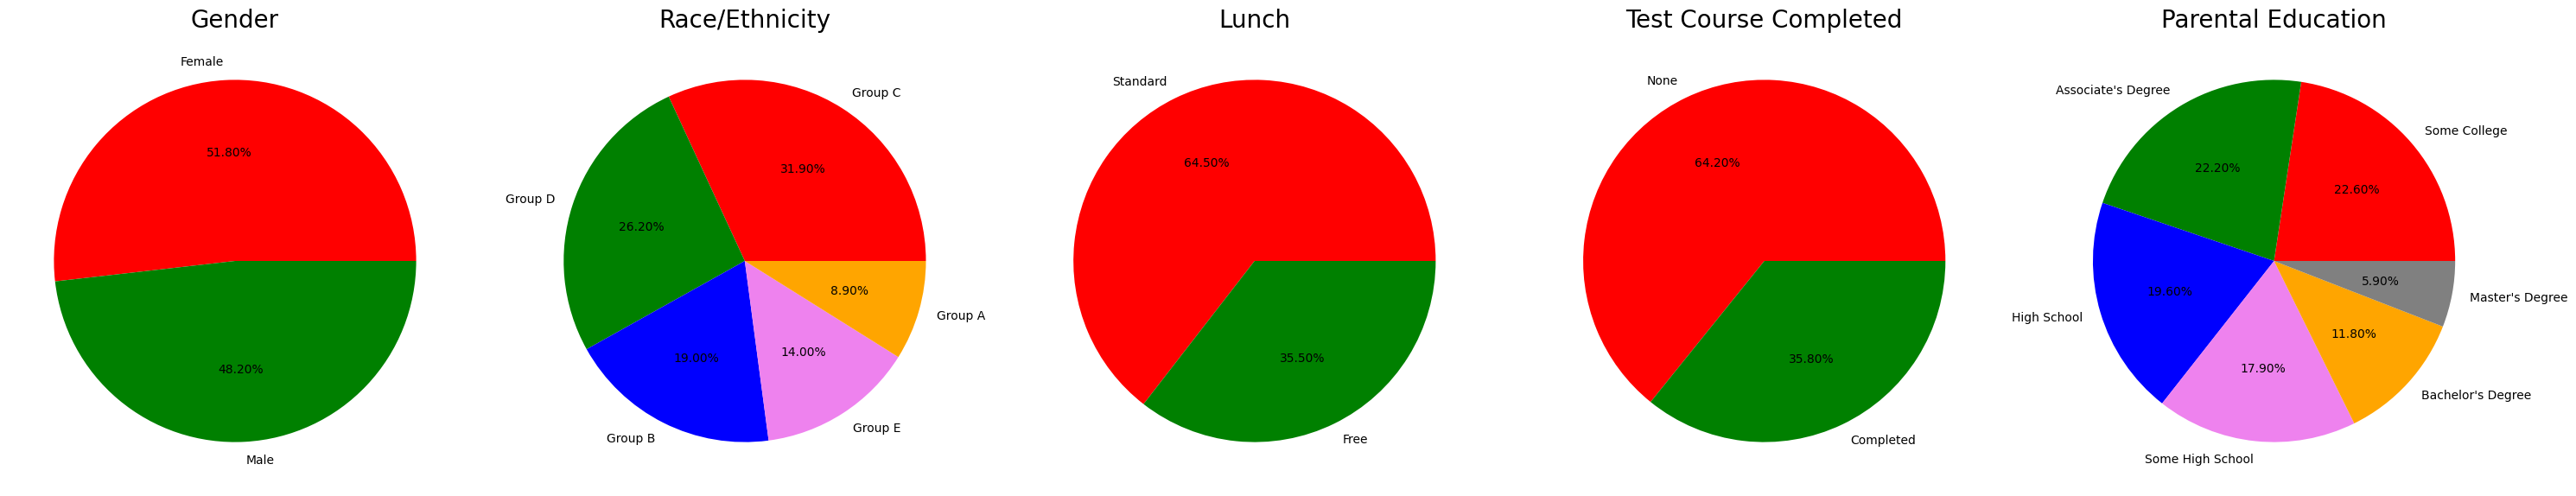

In [36]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(151)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
colors = ['red', 'green']

plt.pie(x=size, colors=colors, labels=labels, autopct="%.2f%%")
plt.title('Gender', fontsize=20)
plt.axis('off')

plt.subplot(152)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
colors = ['red', 'green', 'blue', 'violet', 'orange']

plt.pie(x=size, colors=colors, labels=labels, autopct="%.2f%%")
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(153)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
colors = ['red', 'green']

plt.pie(x=size, colors=colors, labels=labels, autopct="%.2f%%")
plt.title('Lunch', fontsize=20)
plt.axis('off')

plt.subplot(154)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
colors = ['red', 'green']

plt.pie(x=size, colors=colors, labels=labels, autopct="%.2f%%")
plt.title('Test Course Completed', fontsize=20)
plt.axis('off')

plt.subplot(155)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"
colors = ['red', 'green', 'blue', 'violet', 'orange', 'grey']

plt.pie(x=size, colors=colors, labels=labels, autopct="%.2f%%")
plt.title('Parental Education', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.grid()
plt.show()

### Insights
- Number of Male and Female students is almost equal.
- Number students are greatest in Group C.
- Number of students who have standard lunch are greater.
- Number of students who have not enrolled in any test preparation course is greater.
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree".

### 4.4. Feature Wise Visualization
#### 4.4.1. Gender column
- What is the distribution of gender? (Univariate)
- Has gender any impact on student's performance? (Bivariate) 

##### Univariate analysis

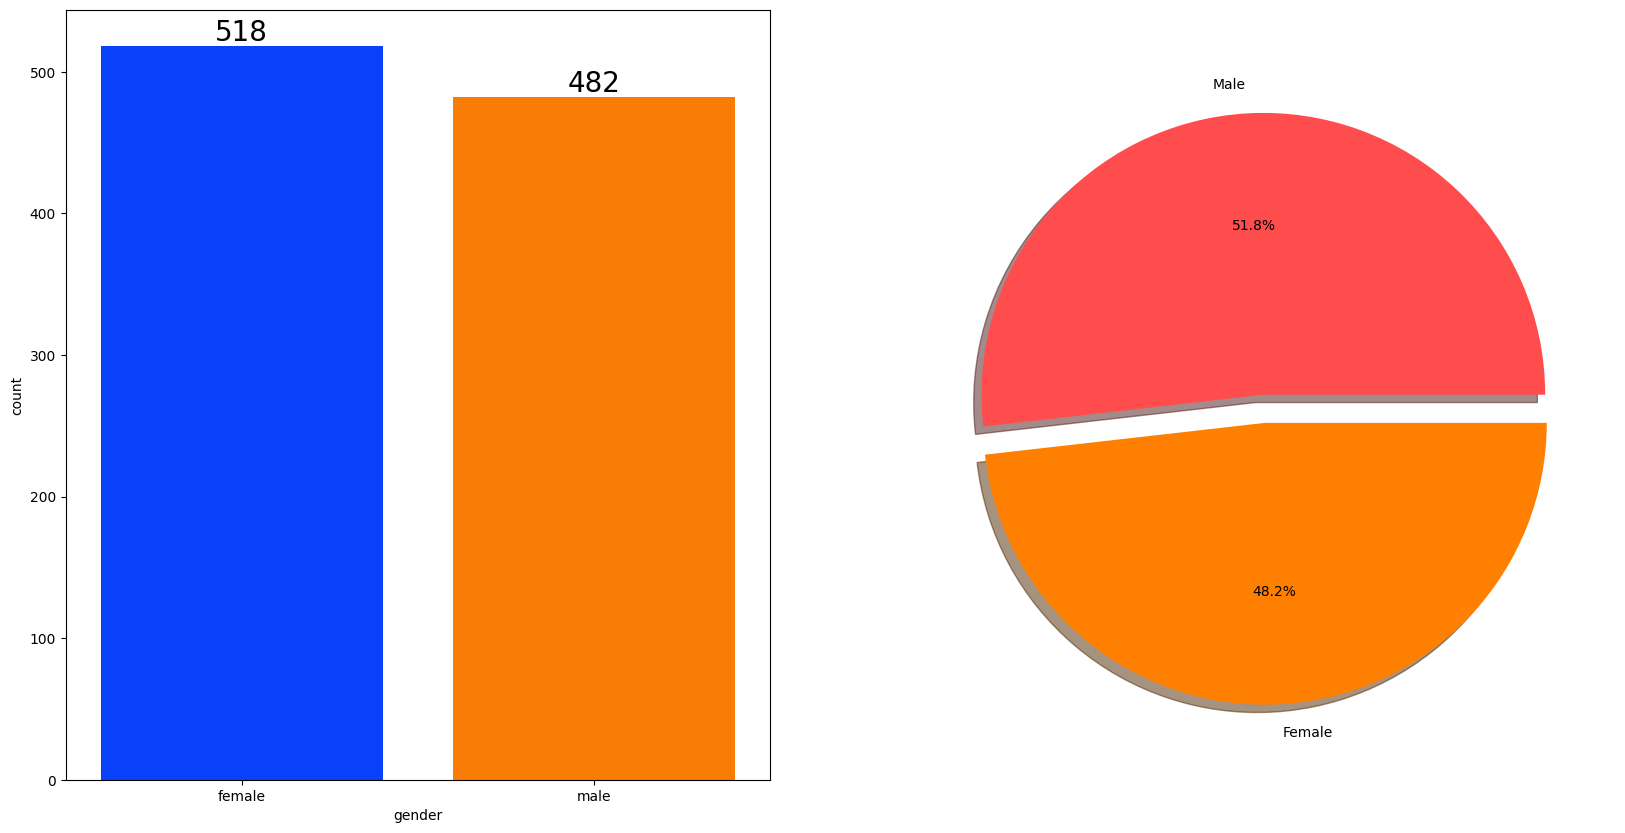

In [37]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.countplot(x=df['gender'], data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

plt.pie(x=df['gender'].value_counts(), labels=['Male', 'Female'], explode=[0, 0.1], 
        autopct='%1.1f%%', shadow=True, colors=['#ff4d4d', '#ff8000'])
plt.show()


##### Insights
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%).

##### Bivariate Analysis

In [38]:
gender_group = df.groupby('gender').mean()
gender_group

,math score,reading score,writing score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


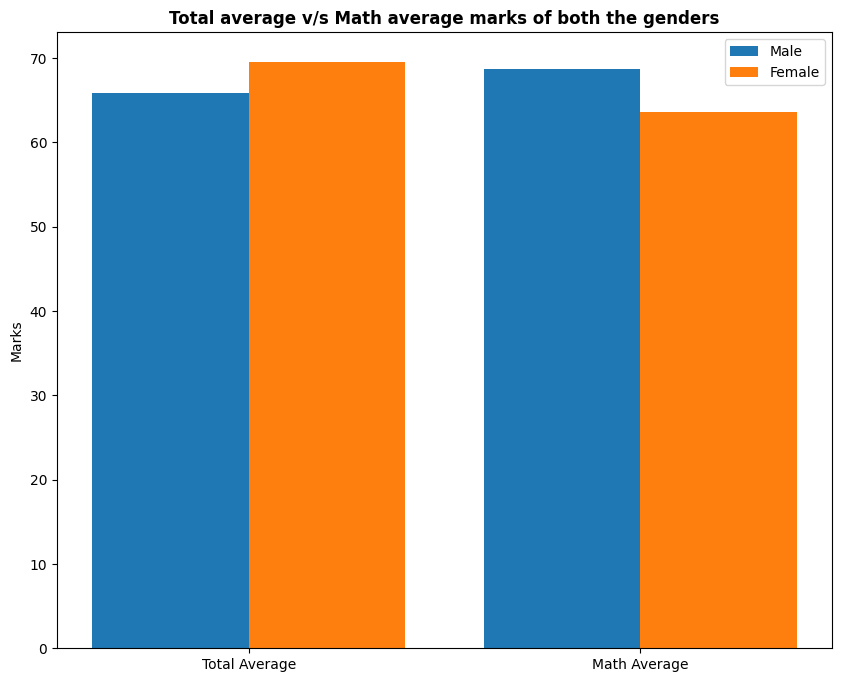

In [39]:
plt.figure(figsize=(10, 8))

X = ['Total Average', 'Math Average']

female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

##### Insights
- On an average females have a better overall score than men.
- Whereas males have scored higher in Maths.

#### 4.4.2. Race/Ethnicity Column
- How is race/ethnicity group distributed? (Univariate)
- Has Race/Ethnicity any impact on student's performance? (Bivariate)

##### Univariate Analysis

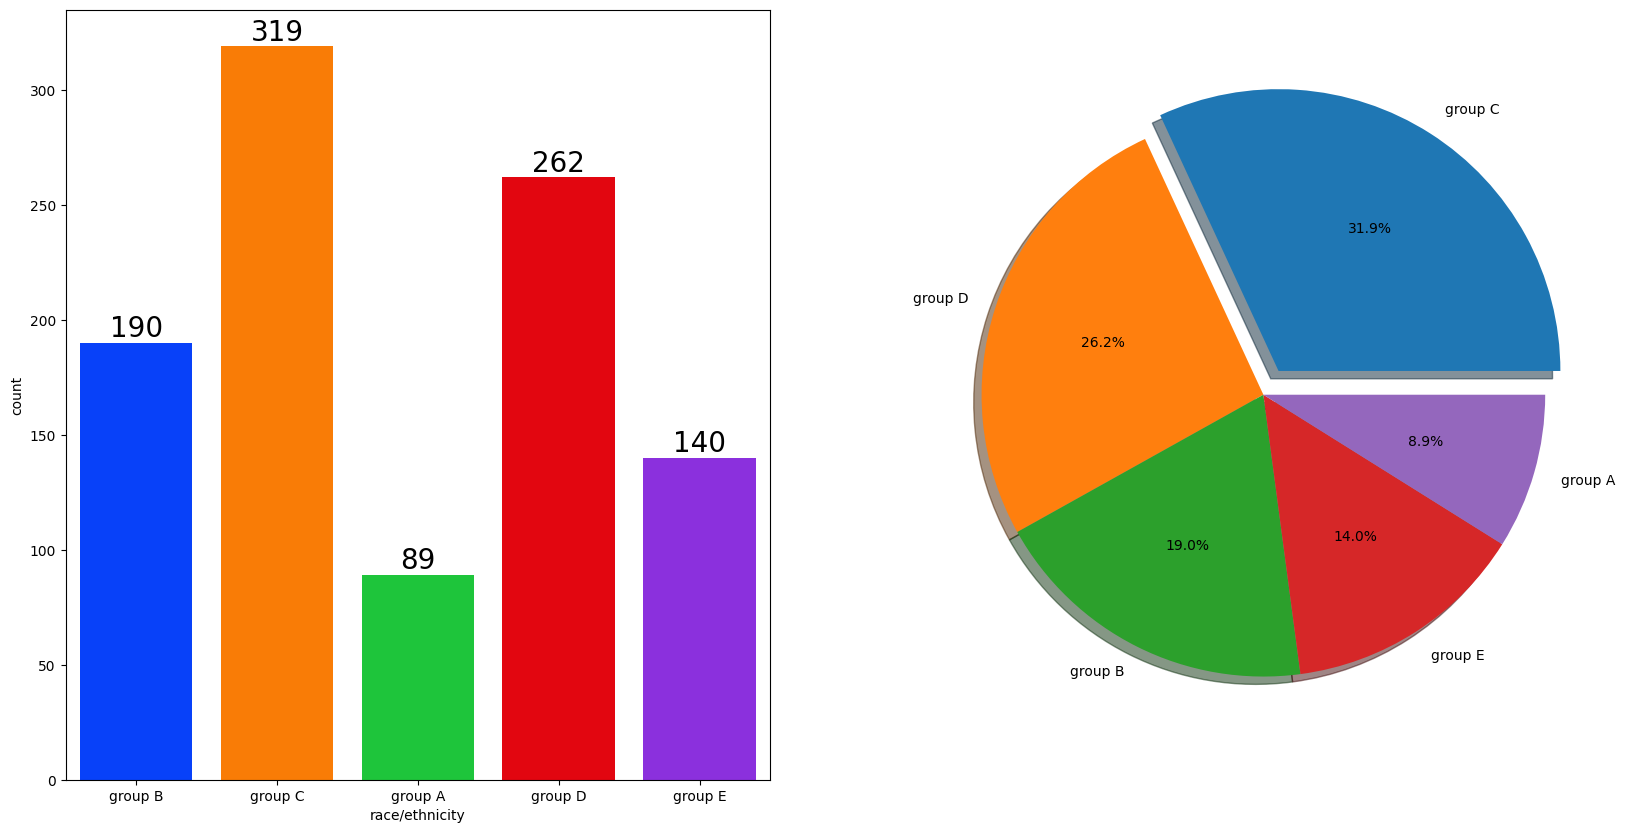

In [40]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.countplot(x=df['race/ethnicity'], data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

plt.pie(x=df['race/ethnicity'].value_counts(), labels=df['race/ethnicity'].value_counts().index,
        explode=[0.1, 0, 0, 0, 0], autopct='%1.1f%%', shadow=True)
plt.show()

##### Insights
- Most of the student belonging from group C / group D.
- Lowest number of students belong to group A.

##### Bivariate Analysis

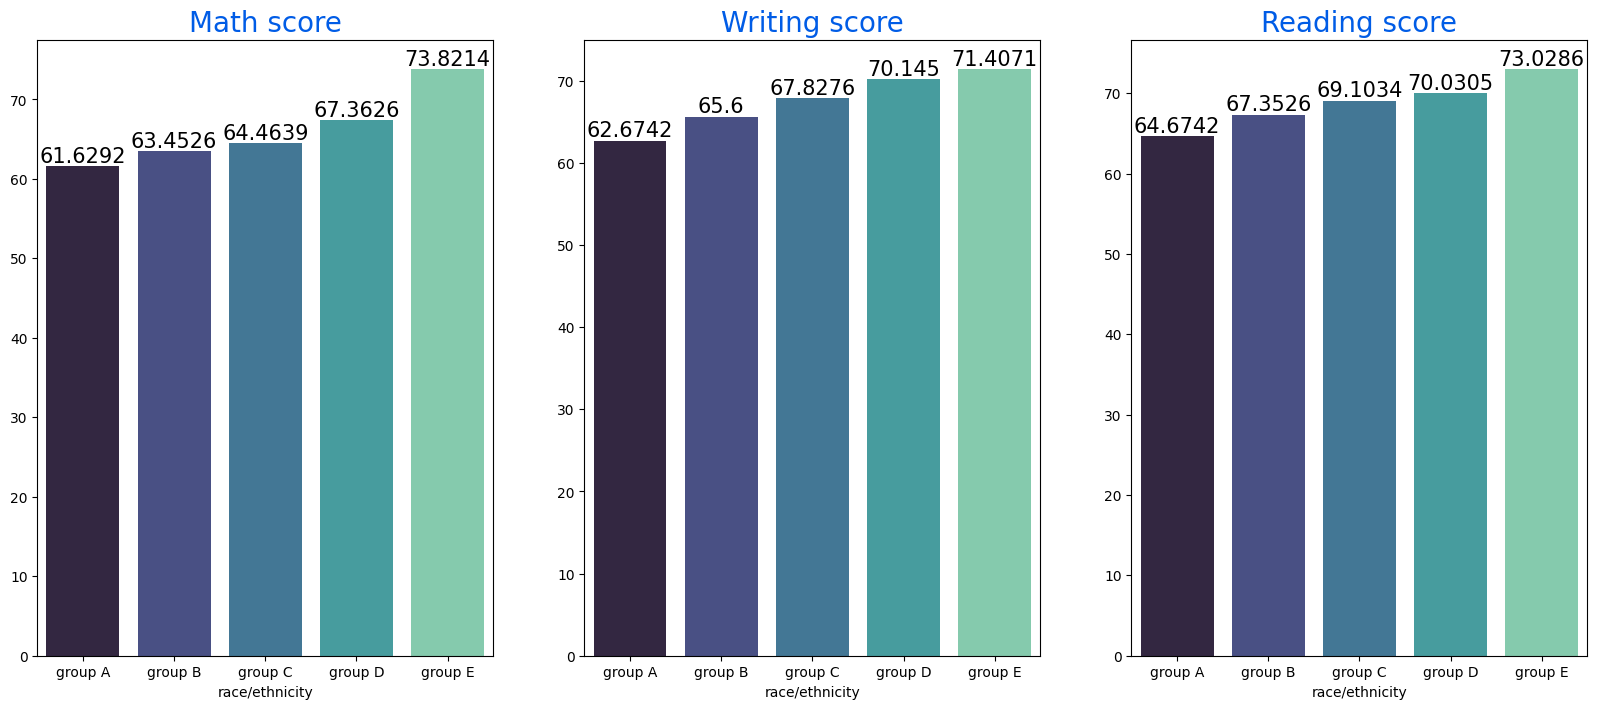

In [41]:
ethni_group_data = df.groupby('race/ethnicity')
f, ax = plt.subplots(1, 3, figsize=(20, 8))

sns.barplot(x=ethni_group_data['math score'].mean().index, y=ethni_group_data['math score'].mean().values, palette='mako', ax=ax[0])
ax[0].set_title('Math score', color='#005ce6', size=20)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

sns.barplot(x=ethni_group_data['writing score'].mean().index, y=ethni_group_data['writing score'].mean().values, palette='mako', ax=ax[1])
ax[1].set_title('Writing score', color='#005ce6', size=20)

for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

sns.barplot(x=ethni_group_data['reading score'].mean().index, y=ethni_group_data['reading score'].mean().values, palette='mako', ax=ax[2])
ax[2].set_title('Reading score', color='#005ce6', size=20)

for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)

##### Insights
- Group E students have scored the highest marks.
- Group A students have scored the lowest marks.
- Students from a lower socio-economic status have a lower average in all course subjects.

#### 4.4.2. Parental Education Column
- What is educational background of student's parents? (Univariate)
- Has parental education any impact on student's performance? (Bivariate)

##### Univariate Analysis

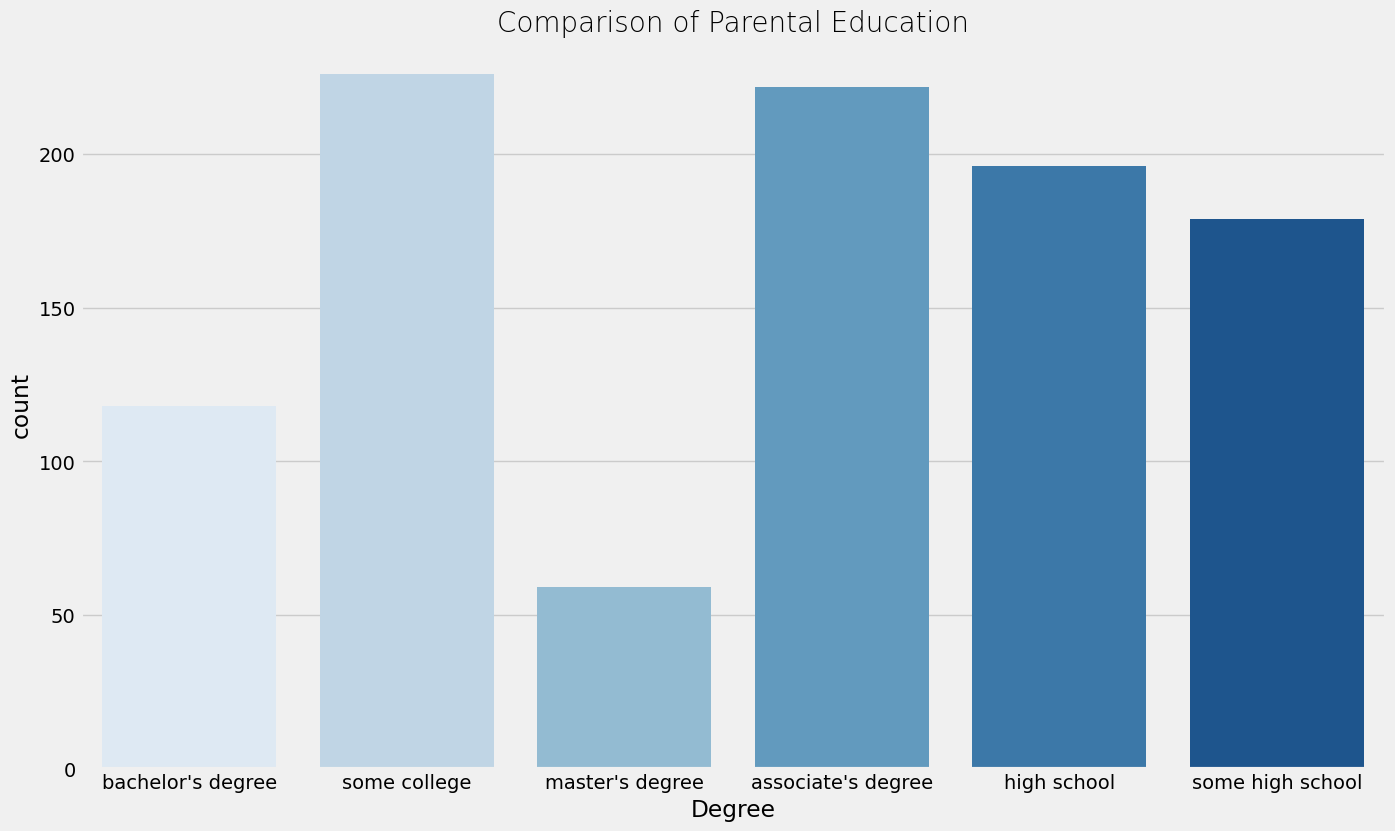

In [45]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(x=df['parental level of education'], palette='Blues')
plt.title('Comparison of Parental Education', fontweight=30, fontsize=20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()


##### Insights
- Largest number of parents are from some college.

##### Bivariate Analysis

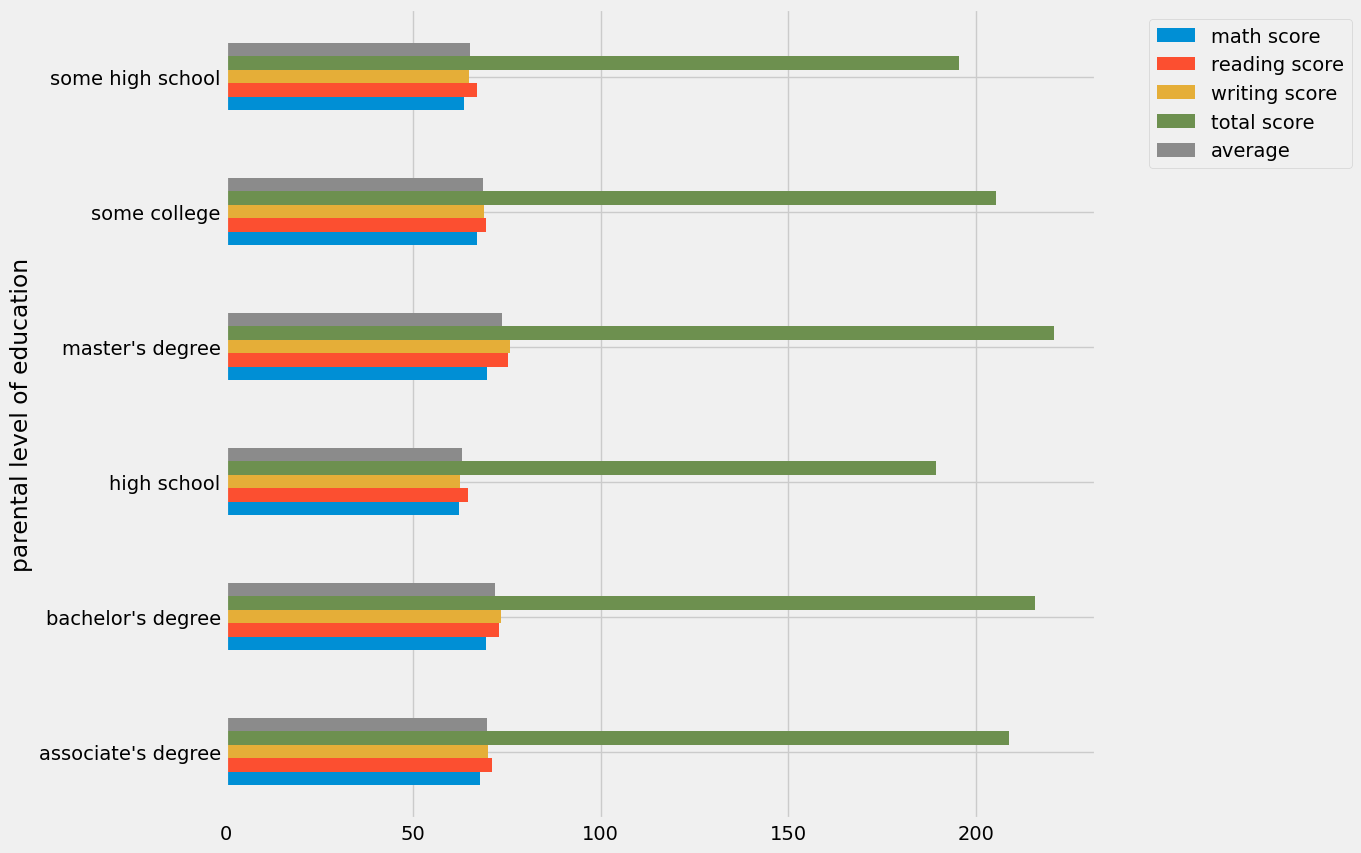

In [49]:
df.groupby('parental level of education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

##### Insights
- The score of student whose parents possess master and bachelor level education are higher than others.

#### 4.4.2. Lunch Column
- What type of lunch is common among students? (Univariate)
- What is the impact of lunch type on student's performance? (Bivariate)

##### Univariate Analysis

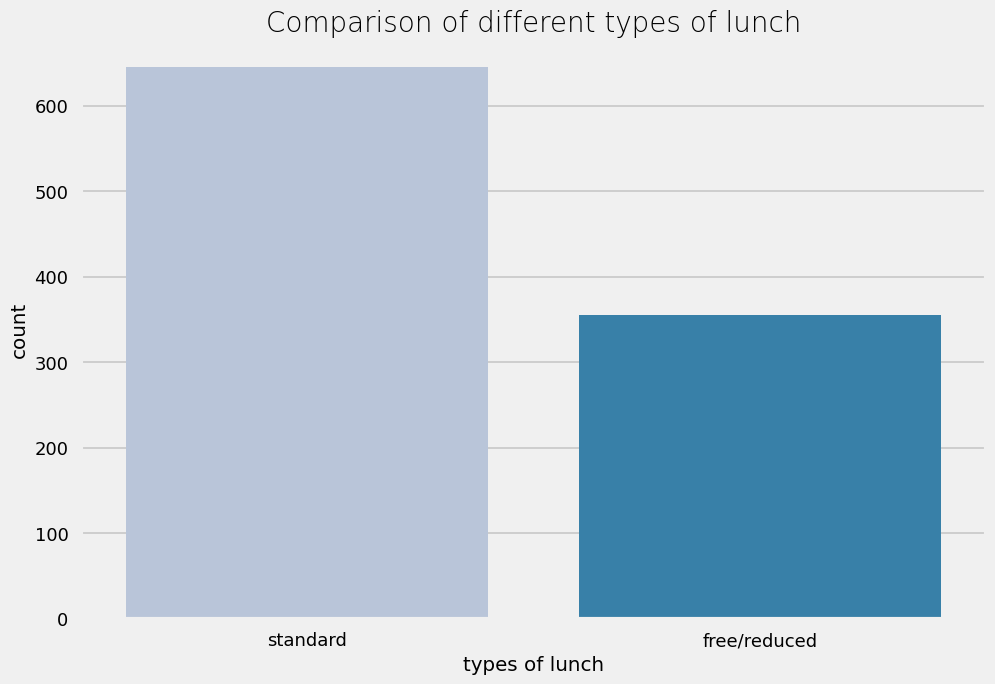

In [51]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(x=df['lunch'], palette='PuBu')
plt.title('Comparison of different types of lunch', fontweight=30, fontsize=20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()


##### Insights
- Students being served Standard lunch was more than free lunch.

##### Bivariate Analysis

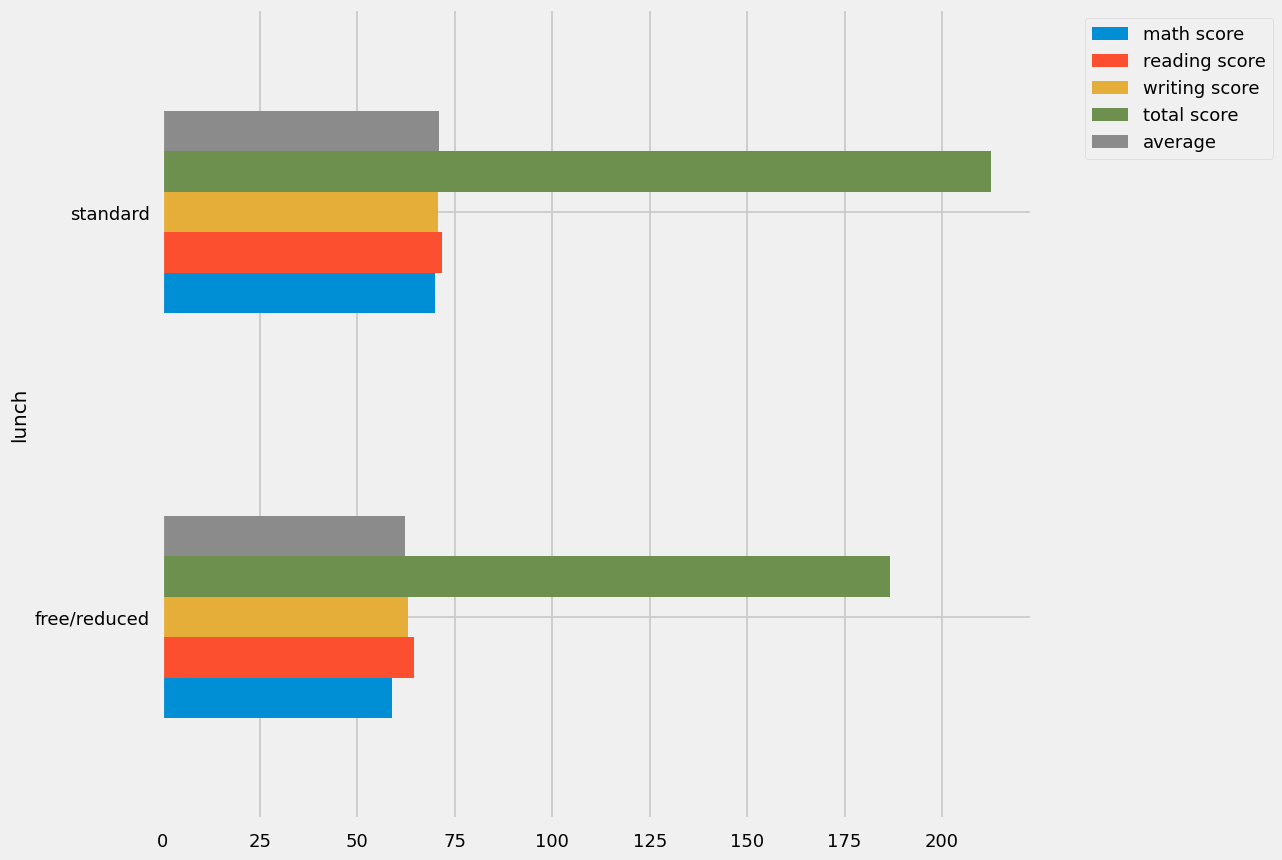

In [55]:
df.groupby('lunch').agg('mean').plot(kind='barh',figsize=(10, 10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

##### Insights
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch.

#### 4.4.2. Test Preparation Course Column
- Do students complete the test preparation course? (Univariate)
- What is the impact of test preparation course on student's performance? (Bivariate)

##### Univariate Analysis

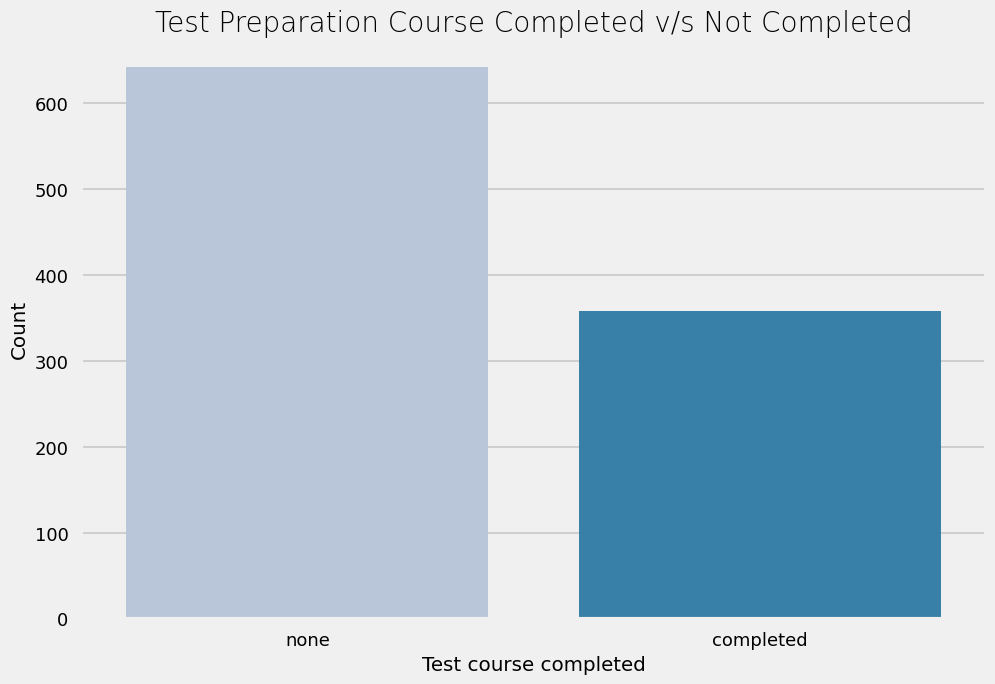

In [58]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(x=df['test preparation course'], palette='PuBu')
plt.title('Test Preparation Course Completed v/s Not Completed', fontweight=30, fontsize=20)
plt.xlabel('Test course completed')
plt.ylabel('Count')
plt.show()

##### Insights
- Most of the students do not complete the test preparation course.

##### Bivariate Analysis

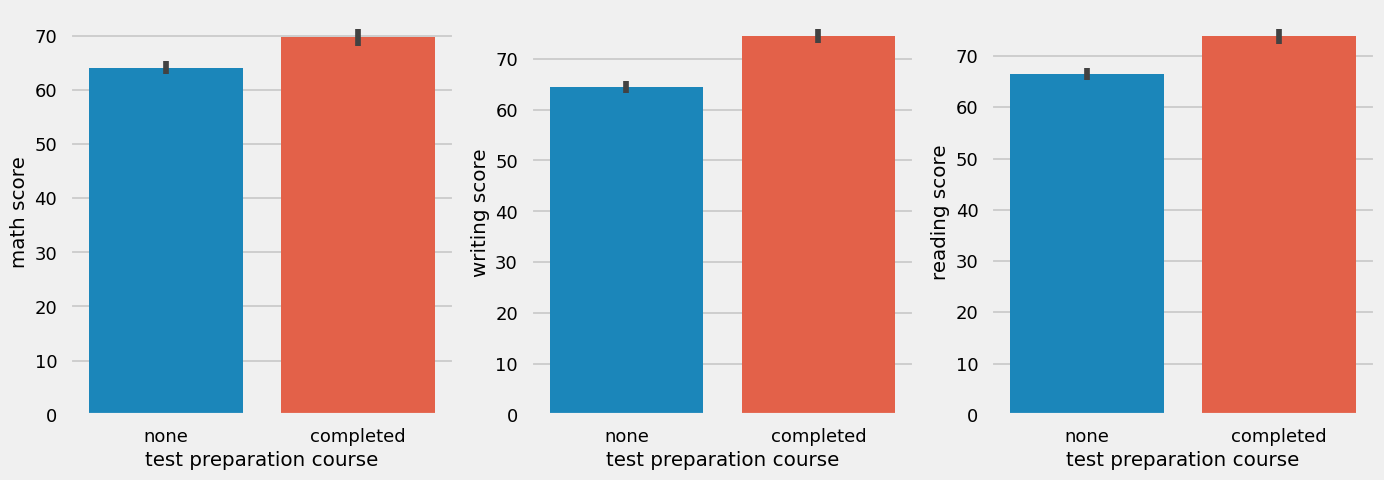

In [73]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.barplot (x=df['test preparation course'], y=df['math score'])
plt.subplot(1,3,2)
sns.barplot (x=df['test preparation course'], y=df['writing score'])
plt.subplot(1,3,3)
sns.barplot (x=df['test preparation course'], y=df['reading score'])
plt.show()

##### Insights
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course.

#### 4.4.6. Checking for outliers

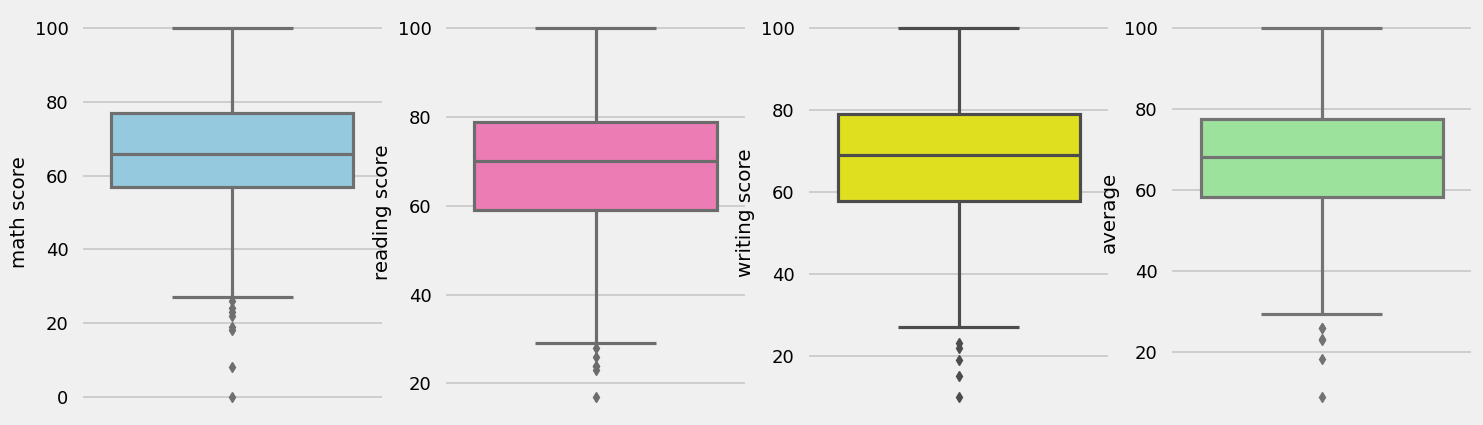

In [76]:
plt.subplots(1, 4, figsize=(16, 5))
plt.subplot(141)
sns.boxplot(y=df['math score'], color='skyblue')
plt.subplot(142)
sns.boxplot(y=df['reading score'], color='hotpink')
plt.subplot(143)
sns.boxplot(y=df['writing score'], color='yellow')
plt.subplot(144)
sns.boxplot(y=df['average'], color='lightgreen')
plt.show()

#### 4.4.7. Multivariate Analysis of Test Scores using Pairplot

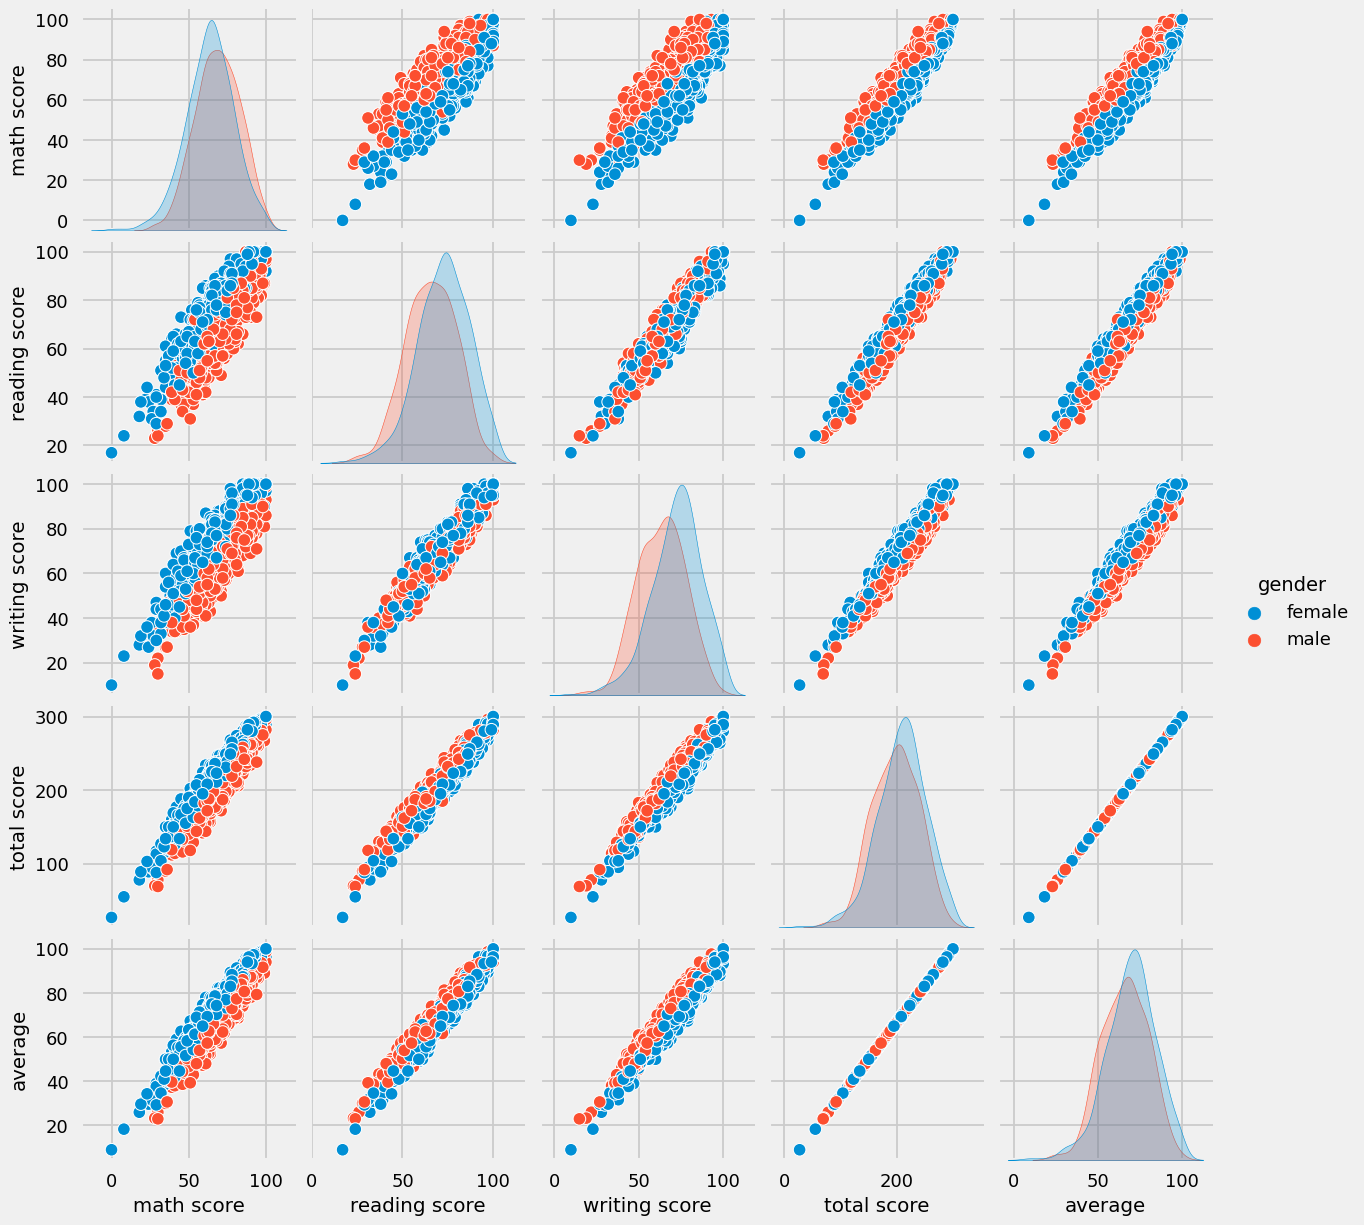

In [78]:
sns.pairplot(df, hue='gender')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

## 5. Conclusions
- Student's Performance is related with lunch, race, parental level education.
- Females lead in pass percentage and also are top-scorers.
- Student's Performance is not much related with test preparation course.
- Finishing preparation course though seems to be beneficial.